## EDA voor OPC-Radiomics (oropharyngeal cancers)
Meer informatie over de dataset is hier te vinden: https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=33948764

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from PIL import Image

df_clinical = pd.read_csv('D:\HW\Radiomics\EDA_folder\OPC_clinical_old.csv')
df_ct = pd.read_csv('D:\HW\Radiomics\EDA_folder\OPC_radiomics_old.csv', header=1)

df_clinical['patient'] = pd.to_numeric(df_clinical['Trial PatientID'].str.replace('OPC-', '').str.lstrip('0'))
df_clinical.drop('Trial PatientID', axis=1, inplace=True)
merged = df_ct.merge(df_clinical, left_on='patient', right_on='patient') #replace df_ct with df_ct[columns]
merged.replace({',': '.'}, regex=True, inplace=True)

## Indeling EDA
Aanvankelijk gaat er in dit verslag worden gekeken naar de geslachtsverhouding, daarna wordt er gezocht naar factoren die veel invloed hebben op potentieel de belangerijkste eigenschap/kolom: 'Status', deze kolom geeft aan of de patiënt mediaan 5 jaar na de behandeling nog leeft. Later in het verslag wordt 'Status' nog wel getoond/benoemd, maar gaat de aandacht naar andere factoren.

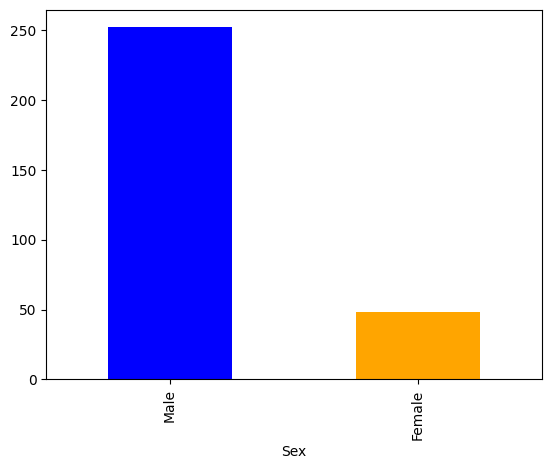

In [72]:
gender_counts = df_clinical['Sex'].value_counts()
colors = ['blue' if gender == 'Male' else 'orange' for gender in gender_counts.index]
ax = gender_counts.plot(kind='bar', color=colors, stacked=True)
plt.show()

In de bovenstaande grafiek is te zien dat er aanzienlijk veel meer mannen dan vrouwen in de dataset zitten. Bij het trekken van conclusies uit deze dataset moet hier rekening mee gehouden worden.

## Invloed van middelengebruik

In de klinische dataset staan 3 kolommen met betrekking tot middelengebruik: 'Drinking hx', 'Smoking Hx' en 'Smoking PY'.

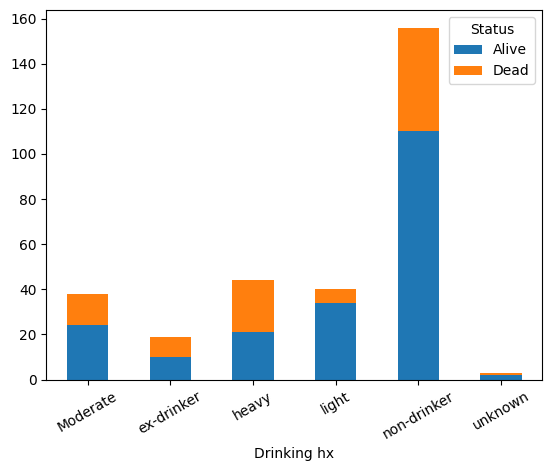

In [73]:
"""
Creates a graph showing the influence of drinking on the survival change/rate.
"""
x_axis = 'Drinking hx'
y_axis = 'Status'

info_status = df_clinical.groupby(x_axis)[y_axis].value_counts().unstack()
ax = info_status.plot(kind='bar', rot=30, stacked=True)
plt.show()

Wat meteen opvalt is dat de grootste groep 'non-drinker' is, en de kleinste groep (na 'unknown') 'ex-drinker' is. Hieruit blijkt dat alcoholgebruik onder de patiënten laag is. De groepen waarin het grootste aandeel uiteindelijk is overleden zijn 'heavy', 'ex-drinkers', ongeveer de helft van de patiënten in deze 2 groepen zijn uiteindelijk overleden. Het is opmerkelijk dat de groep waarbij het grootste aandeel de aandoening heeft overleeft 'light' is, en niet 'non-drinker' of 'ex-drinker'. Een potentiele oorzaak hierachter kan een verschil in levenstijl tussen de groepen zijn.

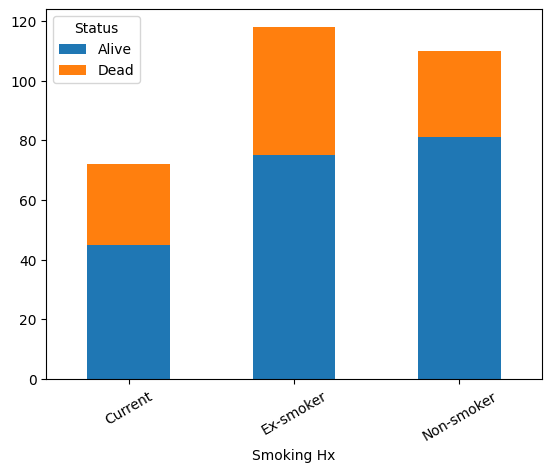

In [74]:
"""
Creates a graph showing the influence of smoking on the survival change/rate.
"""
x_axis = 'Smoking Hx'
y_axis = 'Status'

info_status = df_clinical.groupby(x_axis)[y_axis].value_counts().unstack()
#percentile = df_ct.groupby(x_axis)[y_axis].quantile()
ax = info_status.plot(kind='bar', rot=30, stacked=True)
plt.show()

De grootste groep is 'Ex-smoker'. Volgens het [CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/index.htm#:~:text=Current%20smoking%20has%20declined%20from,every%20100%20adults) rookte er in 2005 (in de periode van dit onderzoek) 20.9% van de Noord Amerikanen.\
In deze dataset is dit de verdeling van de patiënten:

In [75]:
smoking_groups = merged['Smoking Hx'].value_counts().to_dict()
number_of_patients = sum(merged['Smoking Hx'].value_counts().to_list())
print(f'Currently smoking = {smoking_groups["Current"]} ({round(smoking_groups["Current"]/number_of_patients*100, 2)}%)\n\
Ex-smoker = {smoking_groups["Ex-smoker"]} ({round(smoking_groups["Ex-smoker"]/number_of_patients*100, 2)}%)\n\
Non-smoker = {smoking_groups["Non-smoker"]} ({round(smoking_groups["Non-smoker"]/number_of_patients*100, 2)}%)')

Currently smoking = 65 (24.71%)
Ex-smoker = 102 (38.78%)
Non-smoker = 96 (36.5%)


Het verschil is niet aanzienlijk groot, maar er wordt vaker gerookt onder de patiënten die meededen aan dit onderzoek, dan dat de gemiddelde Noord-Amerikaan dat doet. Ook is het aandeel overledenen het kleinst in de groep 'Non-smoker'.

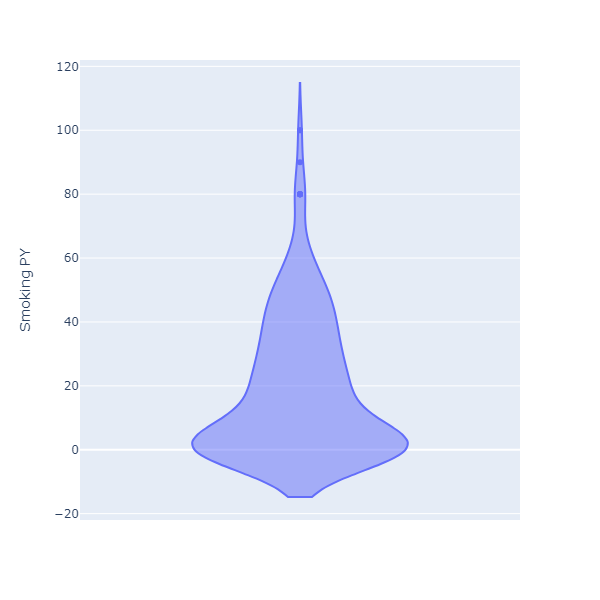

In [76]:
#Image is generated using plotly, it shows 'Status' vs 'Smoking PY'
Image.open("D:\HW\Radiomics\EDA_folder\smoking_py.png")

Dit is de verdeling van 'Smoking PY', er is een duidelijke piek bij 'Smoking PY' = 0, en dit loopt geleiding af wanneer 'Smoking PY' toeneemt.

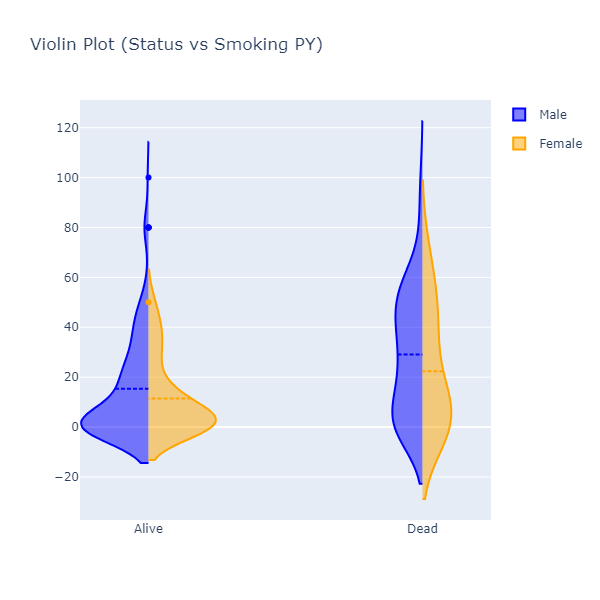

In [77]:
#Image is generated using plotly, it shows 'Status' vs 'Smoking PY'
Image.open("D:\HW\Radiomics\EDA_folder\status_smokingpy.png")

Dit figuur laat beter zien wat de invloed van roken is. In plaats van mensen categoriseren op of op het moment zelf wel of niet roken (Smoking hx), laat Smoking PY zien hoeveel sigaretten iemand voor een langdurige periode heeft gerookt. Kijkende naar de grafiek is er bij 'Alive' een duidelijk piek bij mensen die niet roken (Smoking PY = 0), en een geleidelijke afname des te meer er is gerookt. De vioolplot behorende tot 'Alive' lijkt aanvankelijk sterk op de verdeling van alleen 'Smoking PY' (zie vorige grafiek), maar de 'Alive' loopt sneller af, zo heeft er op 'Smoking PY' = 60 vrijwel geen patiënt het overleeft, ookal zijn er wel patiënten aanwezig die deze waarde hadden. De vioolplot behorende tot 'Dead' is vrij recht, maar doordat het merendeel van de patiënten in de groep 'Smoking PY' 0 t/m 40 valt, geeft dit toch aan dat de kans op overlijden toeneemt wanneer er meer wordt gerookt.

## Invloed van tumoreigenschappen

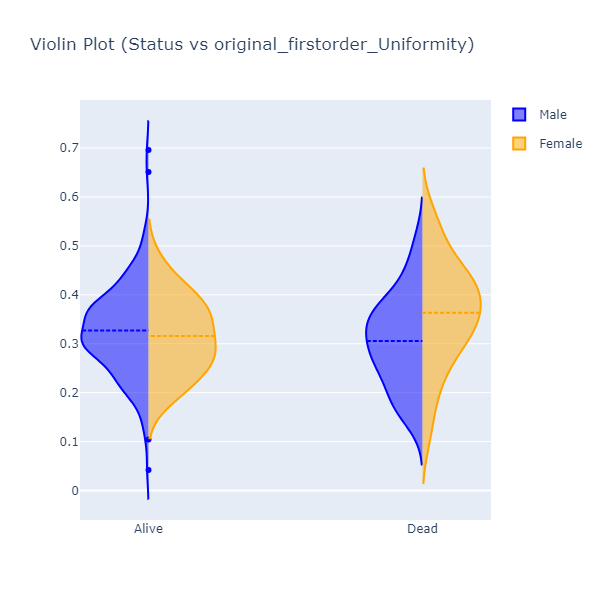

In [78]:
#Image is generated using plotly, it shows 'Status' vs 'original_firstorder_Uniformity'
Image.open("D:\HW\Radiomics\EDA_folder\status_uniformity.png")

Deze grafiek zet 'Status' tegenover 'original_firstorder_Uniformity' wat laat zien hoe uniform de tumor is. Wat interessant is, is dat bij de 'Alive' groep er niet veel verschil tussen mannen en vrouwen is, maar bij de 'Dead' groep juist heel veel. Mannen hebben een lagere overlevingskans wanneer de tumor een lagere 'original_firstorder_Uniformity'-waarde heeft. Vrouwen hebben daarentegen een lagere overlevingskans wanneer de tumor juist een hogere 'original_firstorder_Uniformity'-waarde heeft. Als conclusie kan je hieruit halen dat mannen vatbaarder zijn voor een irregulaire tumor als vrouwen.

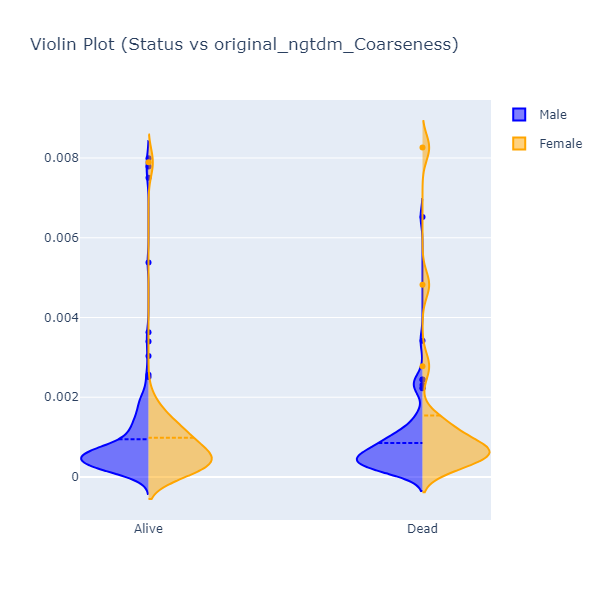

In [79]:
#Image is generated using plotly, it shows 'Status' vs 'original_ngtdm_Coarseness'
Image.open("D:\HW\Radiomics\EDA_folder\status_coarseness.png")

Deze grafiek zet 'Status' tegenover 'original_ngtdm_Coarseness'. Wegens de outliers is de grafiek erg hoog/verticaal.

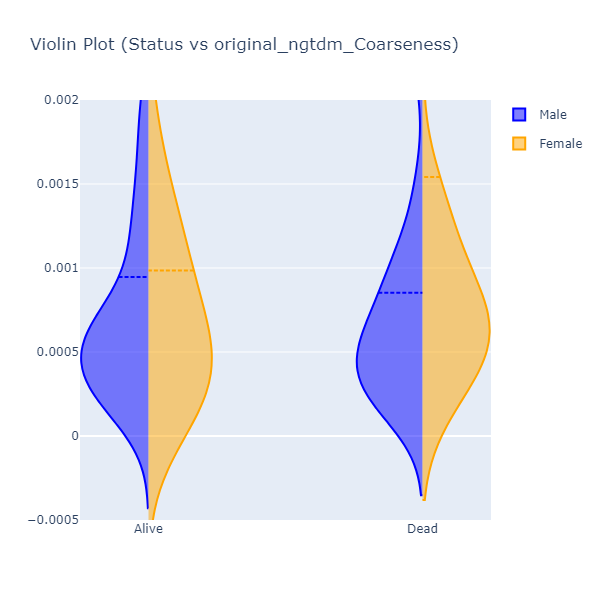

In [80]:
#Image is generated using plotly, it shows 'Status' vs 'original_ngtdm_Coarseness'
Image.open("D:\HW\Radiomics\EDA_folder\status_coarseness_scaled.png")

Om de grafiek wat leesbaarder te maken is de y-as bereik op -0.0005 t/m 0.002 gezet. Wat opvalt is dat er niet veel verschil zit tussen de 'Alive' en 'Dead' groepen. Wat er bij 'original_firstorder_Uniformity' juist was. Er zit een groot verschil tussen 'original_firstorder_Uniformity' en 'original_ngtdm_Coarseness' qua invloed op overlevingskans.

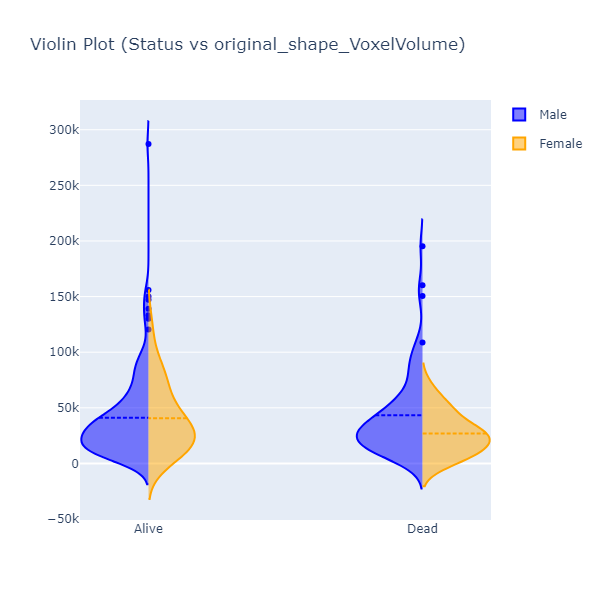

In [81]:
#Image is generated using plotly, it shows 'Status' vs 'original_shape_VoxelVolume'
Image.open("D:\HW\Radiomics\EDA_folder\status_volume.png")


Deze grafiek zet 'Status' tegenover 'original_shape_VoxelVolume' wat het volume van de tumor weergeeft. Wat meteen opvalt is dat bij mannen 'original_shape_VoxelVolume' vrijwel geen invloed heeft op 'Status'. Bij vrouwen is de 'Status' wel afhankelijk van het volume van de tumor. De hoogste 'original_shape_VoxelVolume' van de overleden vrouwen is 67558 en de hoogste 'original_shape_VoxelVolume' van de vrouwen die ziekte hebben overleeft is 122102. Als conclusie kan je hieruit halen dat bij mannen het volume van de tumor weinig invloed heeft op de overlevingskansen. Maar bij vrouwen deze waarde wel invloed heeft op de overlevingskansen.

## Invloed van 

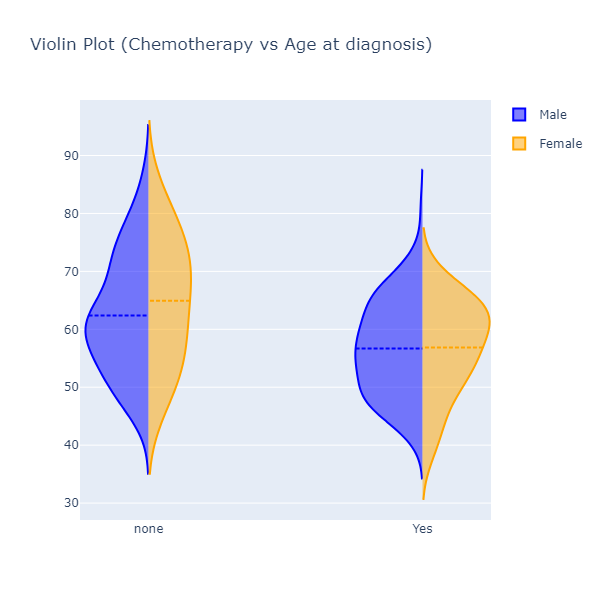

In [82]:
#Image is generated using plotly, it shows 'Chemotherapy' vs 'Age at diagnosis'
Image.open("D:\HW\Radiomics\EDA_folder\chemo_age.png")

Deze grafiek zet 'Chemotherapy' (wel of niet) tegenover 'Age at diagnosis'. Wat aan deze grafiek opvalt is dat jonge patiënten net iets vaker chomotherapie krijgen als oudere patiënten. Daarnaast is het is erg moeilijk om uit deze vioolgrafiek een iets wijs te maken.\
Daarom wordt hieronder een barplot gebruikt voor dezelfde factoren.

In [83]:

fig = px.bar(merged, x='Sex', color='Chemotherapy', barmode= 'group',
                title=f"Bar Plot ({x_axis} vs\n{y_axis})", )
fig.update_layout(autosize=False,width=600,height=600,)

Uit deze grafiek wordt het wel of niet aanwezig zijn van verschillen tussen mannen en vrouwen iets duidelijker, maar is het nogsteeds niet heel goed te zien.

In [84]:
chemo_groups = merged.groupby('Chemotherapy')['Sex'].value_counts().to_list()
male_count = (merged['Sex'] == 'Male').sum()
female_count = (merged['Sex'] == 'Female').sum()
print(f'Wel chemo, Man = {chemo_groups[0]} ({round(chemo_groups[0]/male_count*100, 2)}% van de mannen)\n\
Geen chemo, Man = {chemo_groups[2]} ({round(chemo_groups[2]/male_count*100, 2)}% van de mannen)\n\
Wel chemo, Vrouw = {chemo_groups[1]} ({round(chemo_groups[1]/female_count*100, 2)}% van de vrouwen)\n\
Geen chemo, vrouw = {chemo_groups[3]} ({round(chemo_groups[3]/female_count*100, 2)}% van de vrouwen)')


Wel chemo, Man = 122 (55.2% van de mannen)
Geen chemo, Man = 99 (44.8% van de mannen)
Wel chemo, Vrouw = 24 (57.14% van de vrouwen)
Geen chemo, vrouw = 18 (42.86% van de vrouwen)


Deze procenten zijn heel nuttig, hieruit is duidelijk dat vrouwen vergeleken met mannen iets vaker (2%) chemotherapie ontvangen.